# Objective
Imagine you are Data Scientist who would help find the price for lodging or homestays based on different attributes mentioned in their listings. Oh wait, what are listings? Listings can include written descriptions, photographs with captions, and a user profile where potential guests can get to know a bit about the hosts.

And you are given the listings of one of the most popular cities in central Europe: Amsterdam. Now your job is to build a machine learning model that will automatically predict the price for lodging or homestays.

The data sets have not been cleaned since this is an important step in creating a predictive model. Note also that there are many opportunities to engineer your own features. It is allowed to merge your data with other online data as long as you can make sure that your model also works on the validation data. Note also that the data sets are large so be aware of overfitting your models.


---


Feature Description
* id: The id of each lodge/home/listing
* name: The name/description of the lodge/home
* host_id: The id of the host
* host_name: Name of the host
* neighbourhood: Name of the neighbourhood place
* neighbourhood_group: Group in the neighbourhood
* latitude: Latitude of the location
* longitude: Longitude of the location
* room_type: Type of the room that consumer booked, for example, private room or an entire home, etc.
* minimum_nights: The minimum number of nights customer will stay
* number_of_reviews: Number of reviews given to the lodge/home
* last_review: The date of the last review given to the lodge/home
* reviews_per_month: Average reviews per month
* calculated_host_listings_count: The count of the listing that each host has
* availability_365: The number of days (out of 365 days) for which lodge/home is available

Target
* price: Price for the lodging/homestays in USD - the target variable

In [372]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## Load Dataset

In [373]:
df = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/airbnb%20_data/airbnb_listing_train.csv" )

In [374]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,11602914,Luxury home 100m2+garden in center!,3123809,Marjolein,NaN,De Pijp - Rivierenbuurt,52.35368,4.90177,Entire home/apt,3,13,15-02-2020,0.27,1,0,220
1,13289321,East is where your home is!,10259430,Ana,NaN,Oud-Oost,52.35728,4.92052,Entire home/apt,4,14,19-06-2019,0.29,1,0,110
2,40779315,Amsterdam Central - LUXURY house in BUSY STREET,224969266,Mark,NaN,Centrum-West,52.37582,4.89850,Entire home/apt,2,9,16-03-2020,1.65,1,7,100
3,7820311,great appartment down town,693472,Ayden,NaN,Westerpark,52.37792,4.87300,Entire home/apt,3,42,17-02-2020,0.72,1,0,130
4,27346603,Private room with canal view in peaceful area,41888346,Alissa,NaN,Westerpark,52.38051,4.87493,Private room,2,89,26-02-2020,4.02,1,24,90


In [375]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
12896,20757739,Quiet stylish private room 15 mins to city ce...,63932037,Michelle,NaN,De Baarsjes - Oud-West,52.37194,4.84965,Entire home/apt,1,1,13-09-2017,0.03,1,88,65
12897,1055570,"Beautiful, spacious apt. with great views @ IJ...",5813322,Rens,NaN,IJburg - Zeeburgereiland,52.36263,4.98031,Entire home/apt,7,238,25-02-2020,2.75,1,357,160
12898,13178435,Great apartment de Pijp/Albert Cuyp,46370427,Francien,NaN,De Pijp - Rivierenbuurt,52.35719,4.90009,Entire home/apt,3,15,07-10-2018,0.31,1,0,180
12899,21963760,Stylish apartment in an amazing location,4895882,Olaf,NaN,Zuid,52.34855,4.85105,Entire home/apt,2,11,28-04-2019,0.37,1,0,136
12900,33726315,Amsterdam Apartments First Floor,203460948,City,NaN,Centrum-Oost,52.35865,4.89795,Hotel room,5,1,17-02-2020,0.26,11,365,337


In [376]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
count,1.290100e+04,1.290100e+04,0.0,12901.000000,12901.000000,12901.000000,12901.000000,11305.000000,12901.000000,12901.000000,12901.000000
mean,1.984923e+07,6.321700e+07,NaN,52.365313,4.889744,3.542516,24.803194,0.748501,2.136501,61.392295,166.959538
std,1.216241e+07,8.010814e+07,NaN,0.016418,0.036016,15.154077,53.406134,1.260791,6.001838,107.988329,234.794630
min,2.016800e+04,3.592000e+03,NaN,52.289270,4.755720,1.000000,0.000000,0.010000,1.000000,0.000000,6.000000
25%,9.869642e+06,8.948269e+06,NaN,52.355190,4.863950,2.000000,2.000000,0.180000,1.000000,0.000000,99.000000
50%,1.874939e+07,2.711601e+07,NaN,52.364570,4.887130,2.000000,9.000000,0.380000,1.000000,0.000000,135.000000
75%,2.914232e+07,8.337686e+07,NaN,52.375110,4.909310,3.000000,24.000000,0.770000,1.000000,87.000000,190.000000
max,4.370900e+07,3.490175e+08,NaN,52.425090,5.018400,1001.000000,843.000000,50.000000,78.000000,365.000000,9000.000000


In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12901 entries, 0 to 12900
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              12901 non-null  int64  
 1   name                            12879 non-null  object 
 2   host_id                         12901 non-null  int64  
 3   host_name                       12893 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   12901 non-null  object 
 6   latitude                        12901 non-null  float64
 7   longitude                       12901 non-null  float64
 8   room_type                       12901 non-null  object 
 9   minimum_nights                  12901 non-null  int64  
 10  number_of_reviews               12901 non-null  int64  
 11  last_review                     11305 non-null  object 
 12  reviews_per_month               

There are missing values and outliers

<Figure size 1152x576 with 0 Axes>

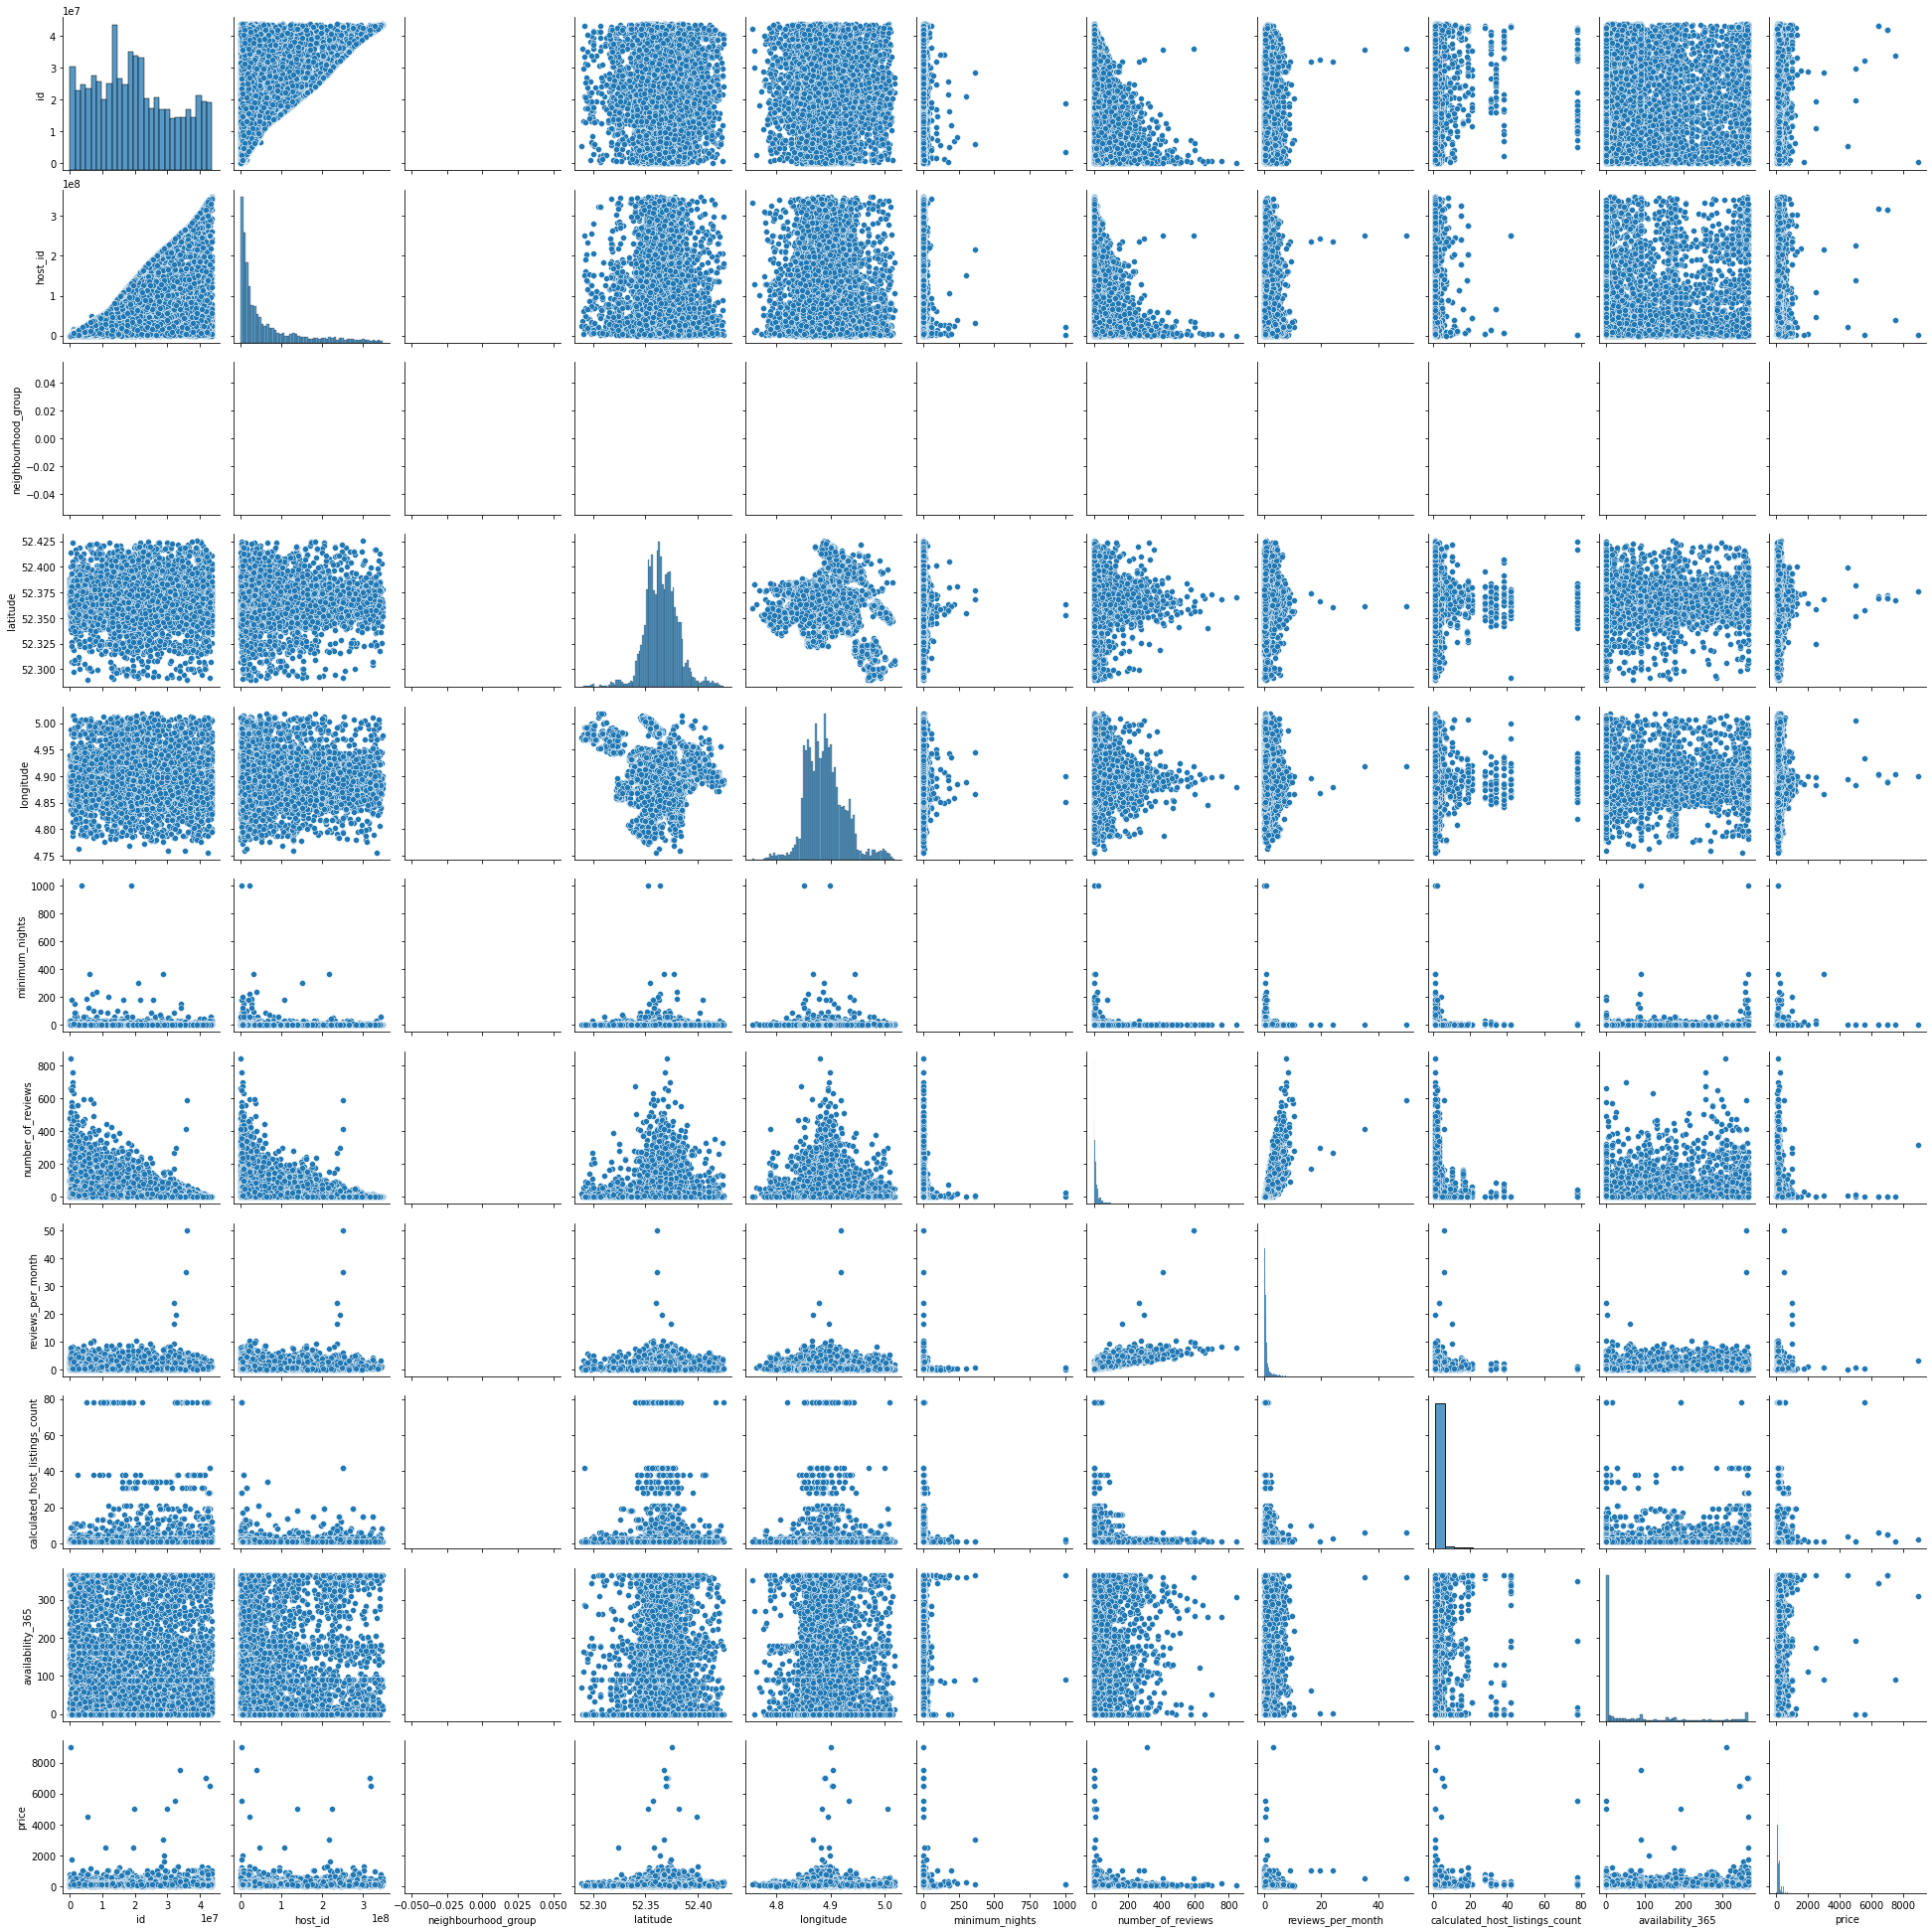

In [378]:
plt.figure(figsize=(16, 8))
sns.pairplot(df)
plt.show()

Visualize to see outliers indication

indicated columns with outliers are
* minimum_nights
* reviews_per_month
* calculated_host_listings_count
* availability_365


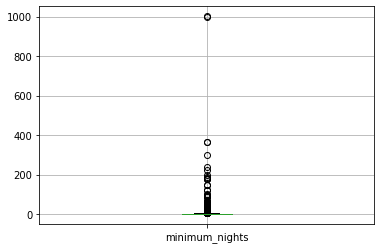

In [379]:
df.boxplot(column='minimum_nights')

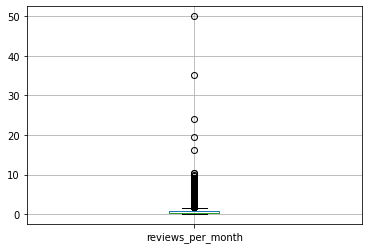

In [380]:
df.boxplot(column='reviews_per_month')

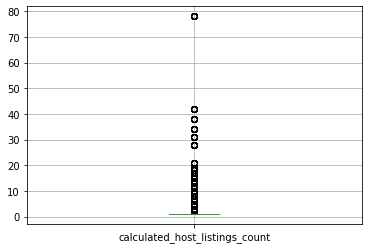

In [381]:
df.boxplot(column='calculated_host_listings_count')

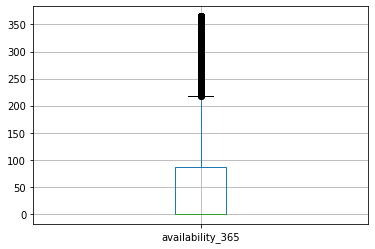

In [382]:
df.boxplot(column='availability_365')

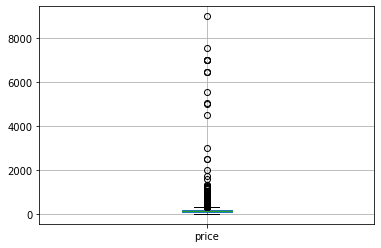

In [383]:
df.boxplot(column='price')

In [384]:
# based on boxplot and pairplot
print(f'Num of minimum_heights > 500: {len(df[df.minimum_nights > 500])}')
print(f'Num of reviews_per_month > 15: {len(df[df.reviews_per_month > 15])}')
print(f'Num of calculated_host_listings_count heights > 50: {len(df[df.calculated_host_listings_count > 50])}')
print(f'Num of availability_365 > 200: {len(df[df.availability_365 > 200])}')
print(f'Num of price > 6000: {len(df[df.price > 6000])}')

Num of minimum_heights > 500: 2
Num of reviews_per_month > 15: 5
Num of calculated_host_listings_count heights > 50: 49
Num of availability_365 > 200: 1618
Num of price > 6000: 9


In [385]:
# df = df[(df.minimum_nights < 500) & (df.reviews_per_month < 15) & (df.calculated_host_listings_count < 50) & (df.price < 6000)] # remove outliers

## Preprocess Data

Drop Unnecessary Column

In [386]:
df = df.drop(columns=['id', 'name', 'host_id', 'host_name', 'neighbourhood_group'])

Look at categorical data

In [387]:
df['neighbourhood'].value_counts()

De Baarsjes - Oud-West                    2209
De Pijp - Rivierenbuurt                   1600
Centrum-West                              1429
Centrum-Oost                              1097
Westerpark                                 958
Zuid                                       924
Oud-Oost                                   831
Bos en Lommer                              730
Oostelijk Havengebied - Indische Buurt     644
Watergraafsmeer                            381
Oud-Noord                                  376
IJburg - Zeeburgereiland                   321
Slotervaart                                269
Noord-West                                 257
Noord-Oost                                 171
Buitenveldert - Zuidas                     155
Geuzenveld - Slotermeer                    144
De Aker - Nieuw Sloten                      88
Osdorp                                      83
Gaasperdam - Driemond                       80
Bijlmer-Centrum                             78
Bijlmer-Oost 

In [388]:
from sklearn.preprocessing import LabelEncoder

In [389]:
enc = LabelEncoder()
neighbourhood = enc.fit_transform(df.neighbourhood)

In [390]:
df['neighbourhood'] = neighbourhood

In [391]:
df.room_type.value_counts()

Entire home/apt    10064
Private room        2622
Hotel room           174
Shared room           41
Name: room_type, dtype: int64

In [392]:
enc = LabelEncoder()
room_type = enc.fit_transform(df.room_type)

In [393]:
df['room_type'] = room_type

In [394]:
df.head()

,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,8,52.35368,4.90177,0,3,13,15-02-2020,0.27,1,0,220
1,17,52.35728,4.92052,0,4,14,19-06-2019,0.29,1,0,110
2,5,52.37582,4.89850,0,2,9,16-03-2020,1.65,1,7,100
3,20,52.37792,4.87300,0,3,42,17-02-2020,0.72,1,0,130
4,20,52.38051,4.87493,2,2,89,26-02-2020,4.02,1,24,90


convert last_review column as number

In [395]:
from datetime import datetime

In [396]:
last_review = pd.to_numeric(pd.to_datetime(df.last_review).dt.strftime("%Y%m%d"), errors='coerce')
last_review

0        20200215.0
1        20190619.0
2        20200316.0
3        20200217.0
4        20200226.0
            ...    
12896    20170913.0
12897    20200225.0
12898    20180710.0
12899    20190428.0
12900    20200217.0
Name: last_review, Length: 12901, dtype: float64

In [397]:
df['last_review'] = last_review

In [398]:
df.head()

,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,8,52.35368,4.90177,0,3,13,20200215.0,0.27,1,0,220
1,17,52.35728,4.92052,0,4,14,20190619.0,0.29,1,0,110
2,5,52.37582,4.89850,0,2,9,20200316.0,1.65,1,7,100
3,20,52.37792,4.87300,0,3,42,20200217.0,0.72,1,0,130
4,20,52.38051,4.87493,2,2,89,20200226.0,4.02,1,24,90


### Split Train / Validation / Test Data

Before we normalize and handle the missing values on data, we should separate train and test data first

In [399]:
from sklearn.model_selection import train_test_split

In [400]:
X = df.drop(columns=['price'], axis=1)
y = df.price

In [401]:
X.shape

(12901, 10)

In [402]:
y.shape

(12901,)

In [403]:
X_train, X_test, y_train, y_test = train_test_split(X, y) # default test_size=0.25

In [404]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (9675, 10)
X_test shape: (3226, 10)
y_train shape: (9675,)
y_test shape: (3226,)


In [405]:
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

### Handling Missing Values

In [406]:
# last_review and reviews_per_month columns have missing values
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

Normalize data

In [407]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_x.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)

X_test_scaled = scaler_x.transform(X_test)
y_test_scaled = scaler_y.transform(y_test)

Impute missing values using mean

In [408]:
imp = SimpleImputer(strategy='mean')
X_train_cleaned = imp.fit_transform(X_train_scaled)
X_test_cleaned = imp.transform(X_test_scaled)

Check if nan still existed

In [409]:
np.isnan(X_train_cleaned).any()

False

In [410]:
np.isnan(X_test_cleaned).any()

False

## Train Model

In [411]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [412]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [413]:
i = Input(shape=(X_train.shape[1]))
x = Dense(64, activation='relu')(i)
x = Dense(64, activation='relu')(x)
x = Dense(1, activation='linear')(x)

In [414]:
model = Model(i, x)
model.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________


In [415]:
model.compile(optimizer='adam', loss='mean_absolute_error')

In [416]:
r = model.fit(X_train_cleaned, y_train_scaled, epochs=20, validation_split=0.2)

Epoch 1/20
242/242 [==============================] - 0s 2ms/step - loss: 0.0112 - val_loss: 0.0079
Epoch 2/20
242/242 [==============================] - 0s 1ms/step - loss: 0.0089 - val_loss: 0.0085
Epoch 3/20
242/242 [==============================] - 0s 1ms/step - loss: 0.0087 - val_loss: 0.0096
Epoch 4/20
242/242 [==============================] - 0s 1ms/step - loss: 0.0086 - val_loss: 0.0076
Epoch 5/20
242/242 [==============================] - 0s 1ms/step - loss: 0.0084 - val_loss: 0.0080
Epoch 6/20
242/242 [==============================] - 0s 1ms/step - loss: 0.0082 - val_loss: 0.0078
Epoch 7/20
242/242 [==============================] - 0s 1ms/step - loss: 0.0084 - val_loss: 0.0078
Epoch 8/20
242/242 [==============================] - 0s 1ms/step - loss: 0.0080 - val_loss: 0.0071
Epoch 9/20
242/242 [==============================] - 0s 1ms/step - loss: 0.0080 - val_loss: 0.0081
Epoch 10/20
242/242 [==============================] - 0s 1ms/step - loss: 0.0080 - val_loss: 0.0084

## Model Evaluation

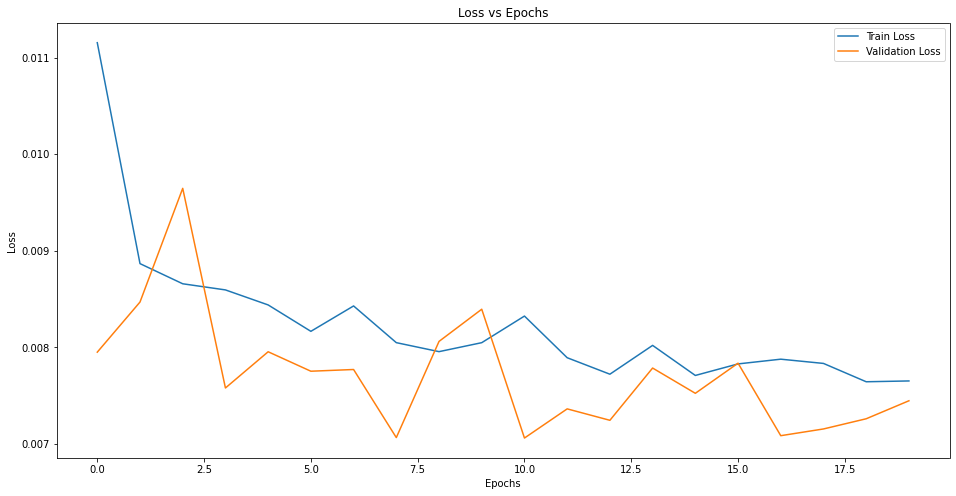

In [417]:
plt.figure(figsize=(16, 8))
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Predictions

In [418]:
t_loss = model.evaluate(X_test_cleaned, y_test_scaled)
print(f'Test loss: {t_loss}')

101/101 [==============================] - 0s 960us/step - loss: 0.0069
Test loss: 0.0068582212552428246


In [419]:
y_pred_scaled = model.predict(X_test_cleaned)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

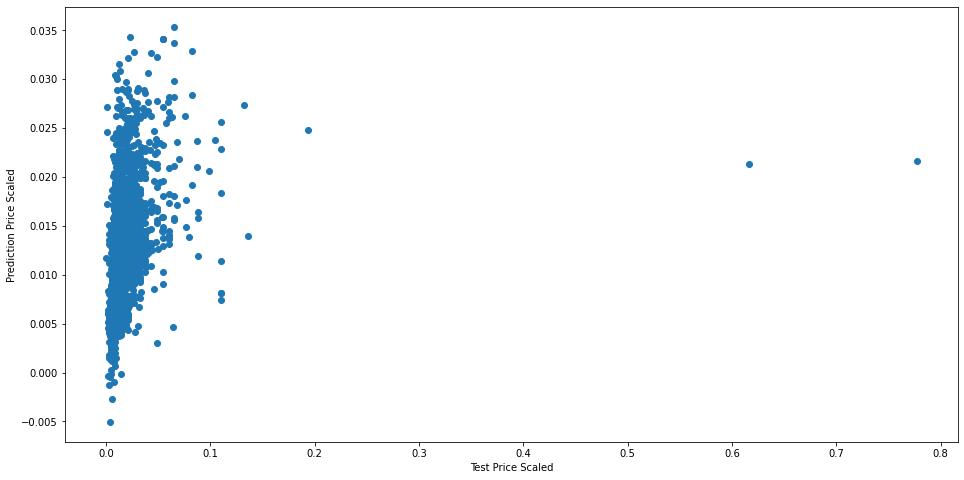

In [420]:
plt.figure(figsize=(16, 8))
plt.scatter(y_test_scaled, y_pred_scaled)
plt.xlabel('Test Price Scaled')
plt.ylabel('Prediction Price Scaled')
plt.show()

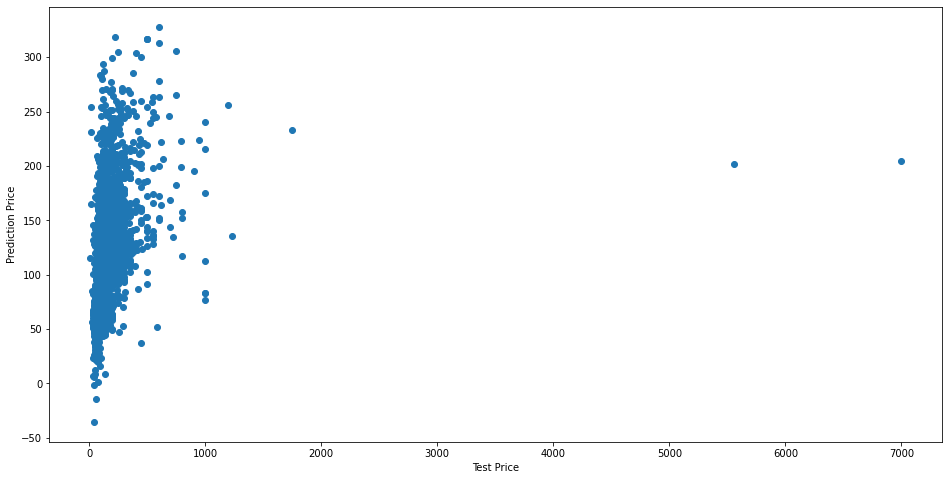

In [421]:
plt.figure(figsize=(16, 8))
plt.scatter(y_test, y_pred)
plt.xlabel('Test Price')
plt.ylabel('Prediction Price')
plt.show()

In [422]:
print(f'Absolute Error: {np.sum(np.absolute(y_pred - y_test))}')

Absolute Error: 198900.3465975523


Sample Prediction

In [423]:
j = np.random.randint(0, len(X_test_cleaned))
sample_pred = scaler_y.inverse_transform(model.predict(X_test_cleaned[j].reshape(-1, 10)))

In [424]:
y_test[j]

array([120])

In [425]:
sample_pred

array([[100.95714]], dtype=float32)